## Walk or Run v1
In this notebook we will train a Convolution Neural Network to detect or recognize if a image is of a person walking or running, we read the data and label it by using tensorflow's ImageGenerator. Not gonna go into much details here. It's a simple CNN with 4 conv layers. If you would like to try this out for yourself then you can get the dataset <a href="https://www.kaggle.com/huan9huan/walk-or-run">here<a>

In [1]:
import os
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
BASE_DIR = os.getcwd()

In [3]:
BASE_DIR

'C:\\Users\\raziu\\Desktop\\DATASETS\\walk_or_run'

In [4]:
train_dir = BASE_DIR + "\\walk_or_run_train\\train"
validation_dir = BASE_DIR + "\\walk_or_run_test\\test"

In [5]:
train_walk_dir = train_dir + "\\walk"

train_run_dir = train_dir + "\\run"

# Getting the list of names of images from walk and run in the validation_dir
validation_walk_dir = validation_dir + "\\walk"
validation_run_dir = validation_dir + "\\run"

In [6]:
# Getting the list of names of images from walk and run in the train_dir
train_walk = os.listdir(train_walk_dir)
train_run = os.listdir(train_run_dir)

# Getting the list of names of images from walk and run in the validation_dir
validation_walk = os.listdir(validation_walk_dir)
validation_run = os.listdir(validation_run_dir)

# Printing the above lists
print(train_walk[:5])
print(train_run[:5])
print(validation_walk[:5])
print(validation_run[:5])

['walk_00e3d982.png', 'walk_0173e50c.png', 'walk_02852997.png', 'walk_030ed8f2.png', 'walk_031ff1f1.png']
['run_00061c18.png', 'run_01d134fc.png', 'run_021a5686.png', 'run_033697b0.png', 'run_04b620cc.png']
['walk_035124b5.png', 'walk_0c96b662.png', 'walk_1078e68d.png', 'walk_125cac5b.png', 'walk_158c0f76.png']
['run_0794de59.png', 'run_0987572f.png', 'run_0b30ced7.png', 'run_0c98676d.png', 'run_1073489f.png']


In [7]:
print("Total training walk images:   ", len(os.listdir(train_walk_dir)))
print("Total training run images:    ", len(os.listdir(train_run_dir)))
      
print("Total validation walk images: ", len(os.listdir(validation_walk_dir)))
print("Total validation run images:  ", len(os.listdir(validation_run_dir)))

Total training walk images:    301
Total training run images:     299
Total validation walk images:  59
Total validation run images:   82


Now let us see what our images look like

In [8]:
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

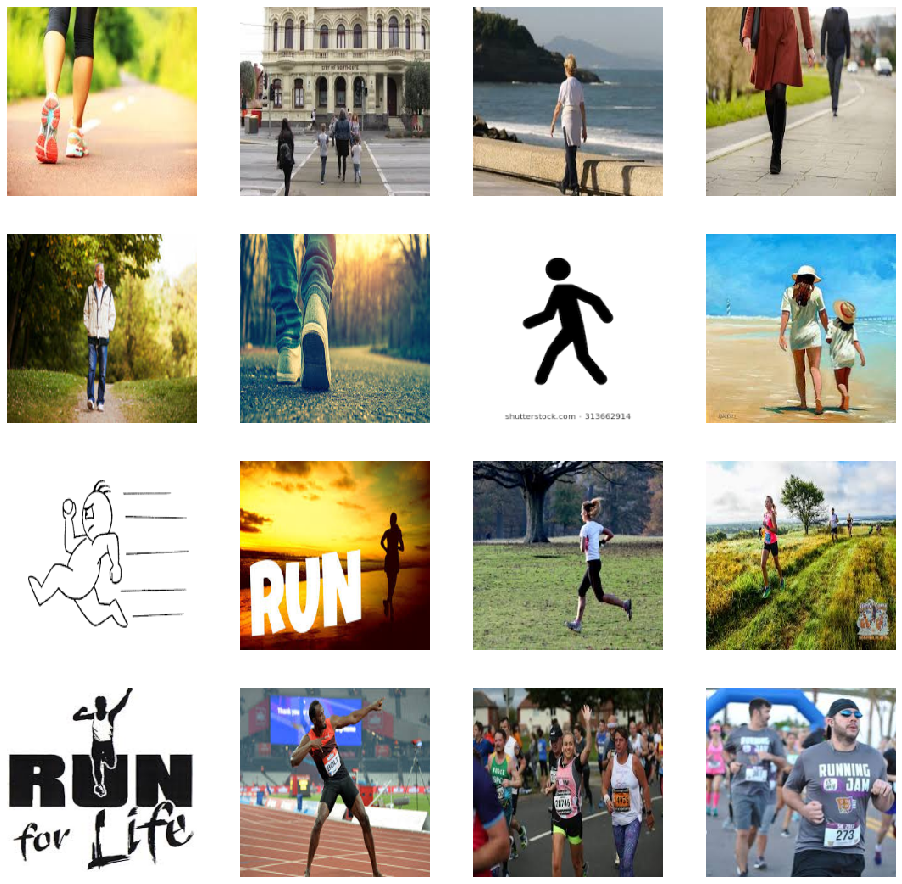

In [9]:
fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)

pic_index += 8

next_walk_pic = [os.path.join(train_walk_dir, fname) for fname in train_walk[pic_index-8:pic_index]]
next_run_pic = [os.path.join(train_run_dir, fname) for fname in train_run[pic_index-8:pic_index]]

for i, img_path in enumerate(next_walk_pic+next_run_pic):
    sp = plt.subplot(nrows,ncols,i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

Building our model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        1

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
             loss="binary_crossentropy",
             metrics=["accuracy"])

Using the ImageDataGenerator to normalize, resize, label and load our data into train and validation generators

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=50, class_mode="binary")

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode="binary")


Found 600 images belonging to 2 classes.
Found 141 images belonging to 2 classes.


In [14]:
history = model.fit(train_generator,
         steps_per_epoch = 12,
         epochs=18,
         validation_data=validation_generator,
         validation_steps = 8,
         verbose=2)

Epoch 1/18
12/12 - 5s - loss: 0.9285 - accuracy: 0.5333 - val_loss: 0.6761 - val_accuracy: 0.6383
Epoch 2/18
12/12 - 5s - loss: 0.6901 - accuracy: 0.5817 - val_loss: 0.6774 - val_accuracy: 0.6241
Epoch 3/18
12/12 - 5s - loss: 0.6842 - accuracy: 0.5733 - val_loss: 0.6508 - val_accuracy: 0.5887
Epoch 4/18
12/12 - 5s - loss: 0.6541 - accuracy: 0.6067 - val_loss: 0.6415 - val_accuracy: 0.5957
Epoch 5/18
12/12 - 5s - loss: 0.6617 - accuracy: 0.6367 - val_loss: 1.1031 - val_accuracy: 0.4255
Epoch 6/18
12/12 - 4s - loss: 0.6666 - accuracy: 0.6400 - val_loss: 0.7198 - val_accuracy: 0.5177
Epoch 7/18
12/12 - 5s - loss: 0.6076 - accuracy: 0.6733 - val_loss: 0.6206 - val_accuracy: 0.6738
Epoch 8/18
12/12 - 5s - loss: 0.5990 - accuracy: 0.6900 - val_loss: 0.7532 - val_accuracy: 0.5319
Epoch 9/18
12/12 - 5s - loss: 0.5450 - accuracy: 0.7300 - val_loss: 0.5887 - val_accuracy: 0.6809
Epoch 10/18
12/12 - 5s - loss: 0.5855 - accuracy: 0.7117 - val_loss: 0.6598 - val_accuracy: 0.6028
Epoch 11/18
12/12 -

Some of the deductions I was able to make by training the model and tuning the hyperparameters,
1. 15 epochs work best
2. RMSprop works better than adam in this case
3. Adding another layer of convolution definitely helps

After doing all of the above I have trained the model with those hyperparameters only

Text(0.5, 1.0, 'Loss vs epochs')

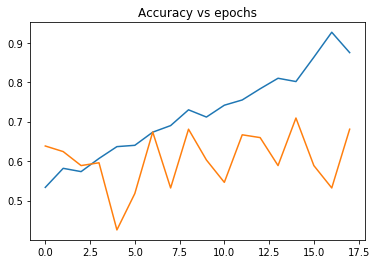

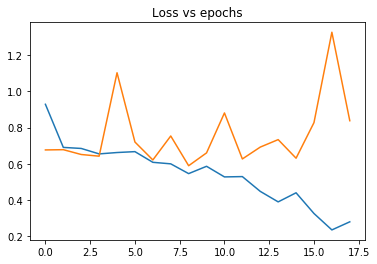

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title("Accuracy vs epochs")
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("Loss vs epochs")

As you can see the model doesnot perform that well. 
It's training_accuracy reaches about 90% while the test accuracy is about 70%.
It clearly overfits the data.
One problable cause is that the amount of data, with only about 700 images combined.
The model doesnot have much to work with.

Also the images are not uniform. They are not all human images or all animated images.
They are a mix of both. The images themselves sometimes contain text along with them.
So the data is not super clean.

The model still performs good.
I will probably apply augmentation to the data and train the model to see if I can
increase the accuracy. It will be in another version of this notebook.

Thank you for reading!